In [ ]:
! pip install -q datasets fasttext-langdetect FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.

In [ ]:
from datasets import load_dataset

chat_dataset = load_dataset("lmsys/lmsys-chat-1m", split="train", num_proc=16)

Setting num_proc from 16 to 6 for the train split as it only contains 6 shards.


Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

In [ ]:
chat_dataset = chat_dataset.filter(
    lambda x: not any(x["openai_moderation"][0]["categories"].values()),
    num_proc=12
)

Filter (num_proc=12):   0%|          | 0/1000000 [00:00<?, ? examples/s]

In [ ]:
chat_dataset = chat_dataset.filter(
    lambda x: x["language"] not in ["unknown", "Klingon", "xx", "zp", "zzp"],
    num_proc=12
)

Filter (num_proc=12):   0%|          | 0/964464 [00:00<?, ? examples/s]

In [ ]:
# Remove anonymised chats, as they will be confusing to any LLMs
# Remove mentions of the LLMs themselves as we hypothesize that these will be less immediately representative of a general LLM prompt
chat_dataset = chat_dataset.filter(
    lambda x: not any(y in x["conversation"][0]["content"].lower() for y in ["name", "gpt", "vicuna", "alpaca", "llama", "koala", "claude", "guanaco"]),
    num_proc=12
)

Filter (num_proc=12):   0%|          | 0/936468 [00:00<?, ? examples/s]

In [ ]:
chat_dataset = chat_dataset.filter(
    lambda x: len(x["conversation"][0]["content"].strip()) > 1,
    num_proc=12
)

Filter (num_proc=12):   0%|          | 0/735390 [00:00<?, ? examples/s]

In [ ]:
chat_dataset[0]["conversation"][0]["content"]

'how can identity protection services help protect me against identity theft'

In [ ]:
from ftlangdetect import detect

def parse_lang(text):
    try:
        return detect(text=text, low_memory=False)
    except:
        return None

chat_dataset = chat_dataset.map(lambda x: {"lang_detect_result": parse_lang(x["conversation"][0]["content"].replace("\n", " "))}, num_proc=8)

Map (num_proc=8):   0%|          | 0/735270 [00:00<?, ? examples/s]

In [ ]:
chat_dataset = chat_dataset.filter(lambda x: x["lang_detect_result"] is not None, num_proc=12)

Filter (num_proc=12):   0%|          | 0/735270 [00:00<?, ? examples/s]

In [ ]:
language_codes = {
    'English': 'en',
    'Portuguese': 'pt',
    'Russian': 'ru',
    'Chinese': 'zh',
    'Spanish': 'es',
    'German': 'de',
    'French': 'fr',
    'Italian': 'it',
    'Japanese': 'ja',
    'Korean': 'ko',
    'Polish': 'pl',
    'Indonesian': 'id',
    'Arabic': 'ar',
    'Turkish': 'tr',
    'Vietnamese': 'vi',
    'Ukrainian': 'uk',
    'Latin': 'la',
    'Danish': 'da',
    'Dutch': 'nl',
    'Greek': 'el',
    'Persian': 'fa',
    'Czech': 'cs',
    'Hungarian': 'hu',
    'Finnish': 'fi',
    'Swedish': 'sv',
    'Hawaiian': 'haw',
    'Serbian': 'sr',
    'Scots': 'gd',
    'Romanian': 'ro',
    'Corsican': 'co',
    'Galician': 'gl',
    'Slovak': 'sk',
    'Thai': 'th',
    'Hebrew': 'he',
    'Tsonga': 'ts',
    'Bulgarian': 'bg',
    'Malay': 'ms',
    'Catalan': 'ca',
    'Esperanto': 'eo',
    'Norwegian': 'no',
    'Norwegian Nynorsk': 'nn',
    'Somali': 'so',
    'Afrikaans': 'af',
    'Occitan': 'oc',
    'Quechua': 'qu',
    'Swahili': 'sw',
    'Macedonian': 'mk',
    'Uzbek': 'uz',
    'Croatian': 'hr',
    'Guarani': 'gn',
    'Breton': 'br',
    'Interlingue': 'ie',
    'Malagasy': 'mg',
    'Luxembourgish': 'lb',
    'Volapük': 'vo',
    'Haitian Creole': 'ht',
    'Tongan': 'to',
    'Manx': 'gv',
    'Basque': 'eu',
    'Sanskrit': 'sa',
    'Bangla': 'bn',
    'Interlingua': 'ia',
    'Oromo': 'om',
    'Xhosa': 'xh',
    'Hindi': 'hi',
    'Samoan': 'sm',
    'Slovenian': 'sl',
    'Kinyarwanda': 'rw',
    'Estonian': 'et',
    'Latvian': 'lv',
    'Wolof': 'wo',
    'Tagalog': 'tl',
    'Waray': 'war',
    'Welsh': 'cy',
    'Māori': 'mi',
    'Seselwa Creole French': 'crs',
    'Bosnian': 'bs',
    'Scottish Gaelic': 'gd',
    'Faroese': 'fo',
    'Southern Sotho': 'st',
    'Lithuanian': 'lt',
    'Tatar': 'tt',
    'Romansh': 'rm',
    'Tswana': 'tn',
    'Khasi': 'kha',
    'Icelandic': 'is',
    'Irish': 'ga',
    'Bislama': 'bi',
    'Ganda': 'lg',
    'Lingala': 'ln',
    'Afar': 'aa',
    'Belarusian': 'be',
    'Javanese': 'jv',
    'Albanian': 'sq',
    'Hausa': 'ha',
    'Maltese': 'mt',
    'Nyanja': 'ny',
    'Kalaallisut': 'kl',
    'Azerbaijani': 'az',
    'Fijian': 'fj',
    'Western Frisian': 'fy',
    'Hmong': 'hmn',
    'Aymara': 'ay',
    'Nauru': 'na',
    'Akan': 'ak',
    'Yoruba': 'yo',
    'Morisyen': 'mfe',
    'Kazakh': 'kk',
    'Cebuano': 'ceb',
    'Turkmen': 'tk',
    'Shona': 'sn',
    'Tajik': 'tg',
    'Sundanese': 'su',
    'Kyrgyz': 'ky',
    'Zhuang': 'za',
    'Sinhala': 'si',
    'Igbo': 'ig',
    'Mongolian': 'mn',
    'Rundi': 'rn',
    'Amharic': 'am',
    'Uyghur': 'ug',
    'Sindhi': 'sd',
    'Tamil': 'ta',
    'Urdu': 'ur',
    'Zulu': 'zu',
    'Swati': 'ss',
    'Northern Sotho': 'nso',
    'Venda': 've',
    'Armenian': 'hy',
    'Cherokee': 'chr',
    'Lao': 'lo',
    'Kurdish': 'ku',
    'Bashkir': 'ba',
    'Burmese': 'my',
    'Pashto': 'ps',
    'Abkhazian': 'ab',
    'Punjabi': 'pa',
    'South Ndebele': 'nr',
    'Nepali': 'ne',
    'Marathi': 'mr',
    'Malayalam': 'ml',
    'Yiddish': 'yi',
    'Sango': 'sg',
    'Inupiaq': 'ik',
    'Kannada': 'kn',
    'Tigrinya': 'ti',
    'Tibetan': 'bo',
    'Odia': 'or',
    'Georgian': 'ka',
    'Khmer': 'km'
}


In [ ]:
import pandas as pd

lang_ser = pd.Series(chat_dataset["language"])
lang_scores = pd.Series([x["score"] for x in chat_dataset["lang_detect_result"]])

In [ ]:
hi_conf_vc = lang_ser[lang_scores > 0.8].value_counts()
lo_conf_vc = lang_ser[lang_scores < 0.8].value_counts()

In [ ]:
hi_conf_vc / hi_conf_vc.sum()

English       0.722696
Russian       0.045155
Portuguese    0.040619
Chinese       0.038288
Spanish       0.030601
                ...   
Odia          0.000002
Marathi       0.000002
Tibetan       0.000002
Bashkir       0.000002
Nepali        0.000002
Name: count, Length: 144, dtype: float64

In [ ]:
lo_conf_vc / lo_conf_vc.sum()

English       0.833771
Spanish       0.028486
Portuguese    0.023449
Chinese       0.014559
Italian       0.009177
                ...   
Sango         0.000012
Inupiaq       0.000006
Lao           0.000006
Kurdish       0.000006
Sinhala       0.000006
Name: count, Length: 137, dtype: float64

<Axes: >

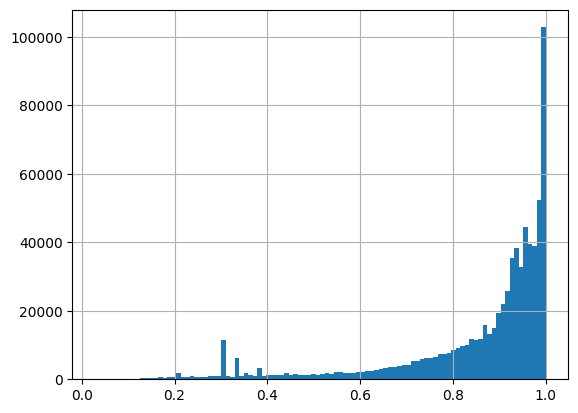

In [ ]:
lang_scores.hist(bins=100)

In [ ]:
(lang_scores > 0.8).mean()

0.7677696628449413

In [ ]:
chat_dataset = chat_dataset.filter(lambda x: x["lang_detect_result"]["score"] > 0.8 and x["lang_detect_result"]["lang"] == language_codes[x["language"]], num_proc=24)

Filter (num_proc=24):   0%|          | 0/735270 [00:00<?, ? examples/s]

In [ ]:
from transformers import GPT2TokenizerFast

tokenizer = GPT2TokenizerFast.from_pretrained('Xenova/gpt-4')

tokenizer_config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/917k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.23M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT4Tokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
chat_dataset = chat_dataset.map(
    lambda x: {
        "first_exchange_len_tokens": len(
            tokenizer.encode(" ".join([y["content"] for y in x["conversation"][:2]])
        ))},
    num_proc=24)

Map (num_proc=24):   0%|          | 0/556368 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd

first_exchange_lens = pd.Series(chat_dataset["first_exchange_len_tokens"])

<Axes: >

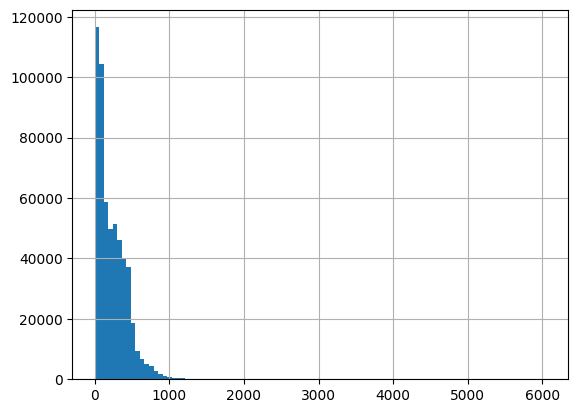

In [ ]:
first_exchange_lens.hist(bins=100)

In [ ]:
(first_exchange_lens < 512).mean()

0.9220713628389843

In [ ]:
chat_dataset = chat_dataset.filter(lambda x: x["first_exchange_len_tokens"] < 512, num_proc=24)

Filter (num_proc=24):   0%|          | 0/556368 [00:00<?, ? examples/s]

In [ ]:
chat_df = chat_dataset.to_pandas()

In [ ]:
chat_df.language.value_counts()

language
English       380138
Chinese        21057
Portuguese     20364
Russian        19551
Spanish        15529
               ...  
Uzbek              1
Turkmen            1
Tibetan            1
Marathi            1
Khmer              1
Name: count, Length: 74, dtype: int64

In [ ]:
chat_df.language.value_counts()[:40]

language
English       380138
Chinese        21057
Portuguese     20364
Russian        19551
Spanish        15529
French         11624
German         11567
Italian        10622
Japanese        5043
Korean          4674
Polish          2526
Arabic          1659
Turkish         1092
Vietnamese      1028
Ukrainian        744
Greek            733
Persian          669
Dutch            658
Hungarian        543
Indonesian       469
Czech            392
Swedish          384
Thai             381
Hebrew           276
Finnish          198
Danish           161
Romanian         138
Bulgarian        129
Catalan           93
Slovak            65
Hindi             56
Bangla            49
Latvian           42
Norwegian         36
Estonian          35
Esperanto         32
Tagalog           30
Croatian          29
Lithuanian        23
Slovenian         21
Name: count, dtype: int64

In [ ]:
selected_chat_df = chat_df.groupby("language").apply(lambda x: x.sample(n=min(25_000, x.shape[0])))

In [ ]:
selected_chat_df

conversation_id             model  \
language                                                                
Afrikaans  404859  68dd2f30eb67471bb36483a68de884f3  RWKV-4-Raven-14B   
           385962  aa0120ed34d246dca16bb21a0c790bdd         koala-13b   
           421761  e5bde988646d470282f07a22242609be        vicuna-13b   
Albanian   498811  90888ce7831d4366a9fecb96331eb791        vicuna-13b   
           197208  9f4176602c834577a5b628ada76d01ec        vicuna-13b   
...                                             ...               ...   
Vietnamese 474570  f954895d75e14bbc9a2e8ee43e3a6a61      dolly-v2-12b   
Waray      172367  9dec37ec75754525a327084a7eb54ee5      mpt-30b-chat   
           407852  01967fc06a984cc2b70c47a92ac1447d         koala-13b   
Yiddish    498929  286caec2639c42c98fcf49ea54327d8e        vicuna-13b   
           62613   73159e4f3ca1465c9cb2d7fba6171e73         koala-13b   

                                                        conversation  turn  \
language                                                                     
Afrikaans  404859  [{'content': 'Skryf 'n limeriek oor die proble...     1   
           385962  [{'content': 'Skryf 'n limeriek oor die proble...     1   
           421761  [{'content': 'Die volgende is veelvuldige keus...     1   
Albanian   498811  [{'content': 'A flet shqip?', 'role': 'user'},...     1   
           197208  [{'content': 'A flet shqip? ', 'role': 'user'}...     3   
...                                                              ...   ...   
Vietnamese 474570  [{'content': 'trả lời phỏng vấn', 'role': 'use...     1   
Waray      172367  [{'content': 'hiya', 'role': 'user'}, {'conten...     8   
           407852  [{'content': 'hiya!', 'role': 'user'}, {'conte...    11   
Yiddish    498929  [{'content': 'איך ', 'role': 'user'}, {'conten...     3   
           62613   [{'content': 'פארצייל מיר א מעשה פון בערן', 'r...     1   

                     language  \
language                        
Afrikaans  404859   Afrikaans   
           385962   Afrikaans   
           421761   Afrikaans   
Albanian   498811    Albanian   
           197208    Albanian   
...                       ...   
Vietnamese 474570  Vietnamese   
Waray      172367       Waray   
           407852       Waray   
Yiddish    498929     Yiddish   
           62613      Yiddish   

                                                   openai_moderation  \
language                                                               
Afrikaans  404859  [{'categories': {'harassment': False, 'harassm...   
           385962  [{'categories': {'harassment': False, 'harassm...   
           421761  [{'categories': {'harassment': False, 'harassm...   
Albanian   498811  [{'categories': {'harassment': False, 'harassm...   
           197208  [{'categories': {'harassment': False, 'harassm...   
...                                                              ...   
Vietnamese 474570  [{'categories': {'harassment': False, 'harassm...   
Waray      172367  [{'categories': {'harassment': False, 'harassm...   
           407852  [{'categories': {'harassment': False, 'harassm...   
Yiddish    498929  [{'categories': {'harassment': False, 'harassm...   
           62613   [{'categories': {'harassment': False, 'harassm...   

                   redacted                            lang_detect_result  \
language                                                                    
Afrikaans  404859     False   {'lang': 'af', 'score': 0.9444288611412048}   
           385962     False   {'lang': 'af', 'score': 0.9444288611412048}   
           421761     False   {'lang': 'af', 'score': 0.9355182647705078}   
Albanian   498811     False    {'lang': 'sq', 'score': 0.833220899105072}   
           197208     False    {'lang': 'sq', 'score': 0.833220899105072}   
...                     ...                                           ...   
Vietnamese 474570     False   {'lang': 'vi', 'score': 0.9994461536407471}   
Waray      

In [ ]:
from FlagEmbedding import BGEM3FlagModel

model = BGEM3FlagModel('BAAI/bge-m3', use_fp16=True)

Fetching 22 files:   0%|          | 0/22 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

imgs/bm25.jpg:   0%|          | 0.00/69.0k [00:00<?, ?B/s]

colbert_linear.pt:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

imgs/miracl.jpg:   0%|          | 0.00/448k [00:00<?, ?B/s]

imgs/mkqa.jpg:   0%|          | 0.00/608k [00:00<?, ?B/s]

imgs/long.jpg:   0%|          | 0.00/485k [00:00<?, ?B/s]

imgs/others.webp:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

imgs/nqa.jpg:   0%|          | 0.00/158k [00:00<?, ?B/s]

long.jpg:   0%|          | 0.00/127k [00:00<?, ?B/s]

imgs/.DS_Store:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

sparse_linear.pt:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

In [ ]:
import torch
import numpy as np

filtered_dfs = []

for lang, lang_df in selected_chat_df.reset_index(drop=True).groupby("language"):
    print(lang)
    lang_first_prompts = lang_df["conversation"].apply(lambda x: x[0]["content"])

    prompt_embeddings = model.encode(lang_first_prompts.tolist(),
                            batch_size=12,
                            max_length=512,
                            )['dense_vecs']

    prompt_embeddings_cuda = torch.Tensor(prompt_embeddings).to("cuda")

    prompt_sim = prompt_embeddings_cuda @ prompt_embeddings_cuda.T

    prompt_sim = prompt_sim.cpu().numpy()

    np.fill_diagonal(prompt_sim, 0)
    prompt_sim *= np.tri(*prompt_sim.shape)

    bad_item_idx_row, bad_item_idx_col = np.where(prompt_sim > 0.8)

    unique_rows = set(np.unique(bad_item_idx_row))

    mask = [True if i not in unique_rows else False for i in range(lang_first_prompts.shape[0])]

    print(np.array(mask).mean())

    filtered_dfs.append(lang_df[mask])

Afrikaans
0.6666666666666666
Albanian
0.7142857142857143
Amharic
0.5
Arabic


Inference Embeddings: 100%|██████████| 139/139 [00:05<00:00, 24.00it/s]


0.4755877034358047
Armenian
0.6
Azerbaijani
0.5
Bangla
0.5918367346938775
Basque
0.6
Belarusian
0.3333333333333333
Breton
1.0
Bulgarian
0.43410852713178294
Burmese
0.5
Catalan
0.7849462365591398
Chinese


Inference Embeddings: 100%|██████████| 1755/1755 [01:26<00:00, 20.36it/s]


0.25350239825236265
Croatian
0.3793103448275862
Czech


Inference Embeddings: 100%|██████████| 33/33 [00:01<00:00, 18.78it/s]


0.45663265306122447
Danish
0.4161490683229814
Dutch


Inference Embeddings: 100%|██████████| 55/55 [00:04<00:00, 11.75it/s]


0.5820668693009119
English


Inference Embeddings: 100%|██████████| 2084/2084 [04:04<00:00,  8.52it/s]


0.63084
Esperanto
0.53125
Estonian
0.5142857142857142
Finnish
0.46464646464646464
French


Inference Embeddings: 100%|██████████| 969/969 [01:41<00:00,  9.54it/s]


0.4618891947694425
Georgian
1.0
German


Inference Embeddings: 100%|██████████| 964/964 [01:37<00:00,  9.90it/s]


0.4961528486210772
Greek


Inference Embeddings: 100%|██████████| 62/62 [00:03<00:00, 19.52it/s]


0.4201909959072306
Hebrew


Inference Embeddings: 100%|██████████| 23/23 [00:00<00:00, 28.32it/s]


0.43478260869565216
Hindi
0.35714285714285715
Hungarian


Inference Embeddings: 100%|██████████| 46/46 [00:02<00:00, 21.47it/s]


0.39410681399631675
Icelandic
0.5555555555555556
Indonesian


Inference Embeddings: 100%|██████████| 40/40 [00:01<00:00, 23.61it/s]


0.511727078891258
Italian


Inference Embeddings: 100%|██████████| 886/886 [00:53<00:00, 16.59it/s]


0.664940689135756
Japanese


Inference Embeddings: 100%|██████████| 421/421 [00:19<00:00, 22.14it/s]


0.49990085266706324
Kannada
1.0
Kazakh
0.4
Khmer
1.0
Korean


Inference Embeddings: 100%|██████████| 390/390 [00:18<00:00, 21.36it/s]


0.3442447582370561
Lao
0.16666666666666666
Latin
0.4
Latvian
0.5238095238095238
Lithuanian
0.4782608695652174
Luxembourgish
0.5
Macedonian
0.4166666666666667
Malay
1.0
Malayalam
1.0
Marathi
1.0
Mongolian
0.75
Norwegian
0.7222222222222222
Odia
1.0
Persian


Inference Embeddings: 100%|██████████| 56/56 [00:01<00:00, 35.43it/s]


0.2750373692077728
Polish


Inference Embeddings: 100%|██████████| 211/211 [00:12<00:00, 17.51it/s]


0.43151227236737927
Portuguese


Inference Embeddings: 100%|██████████| 1697/1697 [02:33<00:00, 11.08it/s]


0.6169711255156158
Romanian
0.5144927536231884
Russian


Inference Embeddings: 100%|██████████| 1630/1630 [01:35<00:00, 17.06it/s]


0.41205053449951407
Sanskrit
1.0
Serbian
1.0
Sinhala
0.4166666666666667
Slovak
0.26153846153846155
Slovenian
0.47619047619047616
Spanish


Inference Embeddings: 100%|██████████| 1295/1295 [01:47<00:00, 12.00it/s]


0.5356429905338399
Swedish


Inference Embeddings: 100%|██████████| 32/32 [00:02<00:00, 13.74it/s]


0.6666666666666666
Tagalog
0.7333333333333333
Tamil
0.8333333333333334
Thai


Inference Embeddings: 100%|██████████| 32/32 [00:00<00:00, 35.26it/s]


0.34908136482939633
Tibetan
1.0
Turkish


Inference Embeddings: 100%|██████████| 91/91 [00:05<00:00, 15.67it/s]


0.3717948717948718
Turkmen
1.0
Ukrainian


Inference Embeddings: 100%|██████████| 62/62 [00:03<00:00, 15.63it/s]


0.43413978494623656
Urdu
1.0
Uyghur
1.0
Uzbek
1.0
Vietnamese


Inference Embeddings: 100%|██████████| 86/86 [00:03<00:00, 23.44it/s]


0.4173151750972763
Waray
1.0
Yiddish
1.0


In [ ]:
all_filtered_df = pd.concat(filtered_dfs)

In [ ]:
all_filtered_df["language"].value_counts()[:40]

language
English       15771
Portuguese    12564
Spanish        8318
Russian        8056
Italian        7063
German         5739
French         5369
Chinese        5338
Japanese       2521
Korean         1609
Polish         1090
Arabic          789
Vietnamese      429
Turkish         406
Dutch           383
Ukrainian       323
Greek           308
Swedish         256
Indonesian      240
Hungarian       214
Persian         184
Czech           179
Thai            133
Hebrew          120
Finnish          92
Catalan          73
Romanian         71
Danish           67
Bulgarian        56
Bangla           29
Norwegian        26
Latvian          22
Tagalog          22
Hindi            20
Estonian         18
Slovak           17
Esperanto        17
Lithuanian       11
Croatian         11
Slovenian        10
Name: count, dtype: int64

In [ ]:
from datasets import Dataset

Dataset.from_pandas(all_filtered_df).push_to_hub("lightblue/multilingual_prompts_25k_max", private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/79 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/lightblue/multilingual_prompts_25k_max/commit/0c48b6f0b1cd584f8f1cc155466871b43a0c4270', commit_message='Upload dataset', commit_description='', oid='0c48b6f0b1cd584f8f1cc155466871b43a0c4270', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
! pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 32.0 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("lightblue/multilingual_prompts_25k_max", split="train")

Generating train split:   0%|          | 0/78057 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
from datasets import Dataset, load_dataset, concatenate_datasets

### Tagengo
gpt4_dataset = load_dataset("lightblue/tagengo-gpt4", split="train")
gpt4_dataset = gpt4_dataset.filter(lambda x: x["response"][1] == "stop")

Generating train split:   0%|          | 0/78057 [00:00<?, ? examples/s]

Filter:   0%|          | 0/78057 [00:00<?, ? examples/s]

In [ ]:
df = gpt4_dataset.to_pandas()

In [ ]:
lang_vc = df["language"].value_counts()

In [ ]:
lang_vc["Other"] = lang_vc[lang_vc < 500].sum()

In [ ]:
lang_vc = lang_vc.drop(lang_vc[lang_vc <= 500].index)

Text(0, 0.5, '')

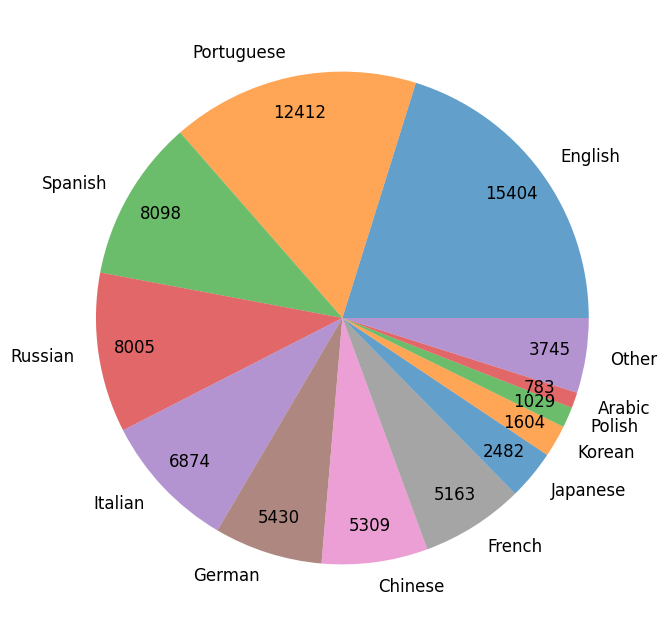

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.cm.tab10
colors = cmap([x % 8 for x in range(len(lang_vc))])
colors[:, -1] = 0.7  # Adjust the alpha channel to make colors lighter

def formatter(x):
    return f"{round((x / 100) * lang_vc.sum())}"

ax=lang_vc.plot.pie(title=None, figsize=(8,8), autopct=formatter, pctdistance=0.85, fontsize=12, colors=colors)
ax.set_ylabel('')
